## TuriCreate Busyness Classifier: Results and Analysis

In [144]:
from model_metrics import *
from preprocessing import *
from crossvalidation import *
from helpers import *
from matplotlib_styles import *

In [145]:
import turicreate as tc
import numpy as np
from statistics import *
from datetime import datetime

In [146]:
## KEY
## sP -> sans Preprocessing
## aP -> avec Preprocessing

In [147]:
print(f"last run: {datetime.now().strftime('%H:%M:%S')}")

tc.data_structures.serialization.enable_sframe_serialization("./sframe_serialization/")

last run: 12:45:37


In [148]:
print("LOADING METRICS", end="\r")

resnet_sP_cv10_metrics = load_metrics_for_config("resnet-50", preprocessing=False, cv_type="cv10")
resnet_aP_cv10_metrics = load_metrics_for_config("resnet-50", preprocessing=True, cv_type="cv10")
resnet_sP_cvlocs_metrics = load_metrics_for_config("resnet-50", preprocessing=False, cv_type="cvlocs")
resnet_aP_cvlocs_metrics = load_metrics_for_config("resnet-50", preprocessing=True, cv_type="cvlocs")

squeezenet_sP_cv10_metrics = load_metrics_for_config("squeezenet_v1.1", preprocessing=False, cv_type="cv10")
squeezenet_aP_cv10_metrics = load_metrics_for_config("squeezenet_v1.1", preprocessing=True, cv_type="cv10")
squeezenet_sP_cvlocs_metrics = load_metrics_for_config("squeezenet_v1.1", preprocessing=False, cv_type="cvlocs")
squeezenet_aP_cvlocs_metrics = load_metrics_for_config("squeezenet_v1.1", preprocessing=True, cv_type="cvlocs")

vfps_sP_cv10_metrics = load_metrics_for_config("VisionFeaturePrint_Scene", preprocessing=False, cv_type="cv10")
vfps_aP_cv10_metrics = load_metrics_for_config("VisionFeaturePrint_Scene", preprocessing=True, cv_type="cv10")
vfps_sP_cvlocs_metrics = load_metrics_for_config("VisionFeaturePrint_Scene", preprocessing=False, cv_type="cvlocs")
vfps_aP_cvlocs_metrics = load_metrics_for_config("VisionFeaturePrint_Scene", preprocessing=True, cv_type="cvlocs")

print("DONE LOADING METRICS", end="\r")

In [149]:
def display_cv_metrics(model_metrics):
    accuracies = [metrics.accuracy for metrics in model_metrics]
    precisions = [metrics.precision for metrics in model_metrics]
    recalls = [metrics.recall for metrics in model_metrics]
    f1s = [metrics.f1 for metrics in model_metrics]

    print(f"ACCURACY  |  mean: {round(mean(accuracies), 3)}  stdev: {round(stdev(accuracies), 3)}")
    print(f"PRECISION |  mean: {round(mean(precisions), 3)}  stdev: {round(stdev(precisions), 3)}")
    print(f"RECALL    |  mean: {round(mean(recalls), 3)}  stdev: {round(stdev(recalls), 3)}")
    print(f"F1        |  mean: {round(mean(f1s), 3)}  stdev: {round(stdev(f1s), 3)}")
    print()
    
    return accuracies, precisions, recalls, f1s

def plot_sP_vs_aP(sP_metrics, aP_metrics, ymin=0, ymax=1, ylabel="", title=""):
    metrics = ["accuracy", "f1"]

    x = np.arange(len(metrics))
    bar_width = 0.2

    plt.figure(figsize=(5, 5))

    plt.bar(x - (0.5 * bar_width),
            sP_metrics,
            bar_width,
            label="without preprocessing")
    plt.bar(x + (0.5 * bar_width),
            aP_metrics,
            bar_width,
            label="with preprocessing")

    plt.xticks(x, metrics)
    plt.ylim(ymin, ymax)
    plt.title(title, pad=20)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

### ResNet-50
#### 10-Fold Cross Validation

* WITHOUT PREPROCESSING *

ACCURACY  |  mean: 0.942  stdev: 0.024
PRECISION |  mean: 0.934  stdev: 0.043
RECALL    |  mean: 0.95  stdev: 0.029
F1        |  mean: 0.941  stdev: 0.026

----------------------------------------

* WITH PREPROCESSING *

ACCURACY  |  mean: 0.954  stdev: 0.021
PRECISION |  mean: 0.948  stdev: 0.038
RECALL    |  mean: 0.959  stdev: 0.02
F1        |  mean: 0.953  stdev: 0.024



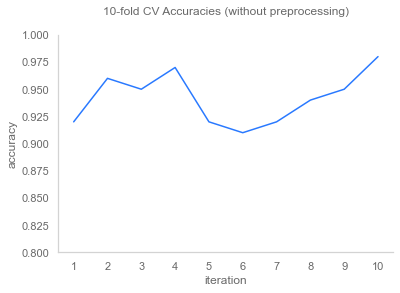

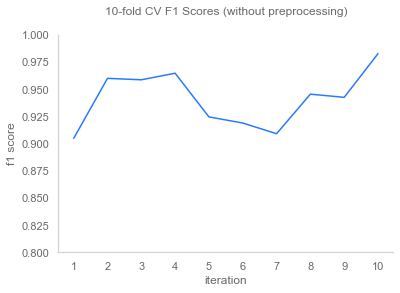

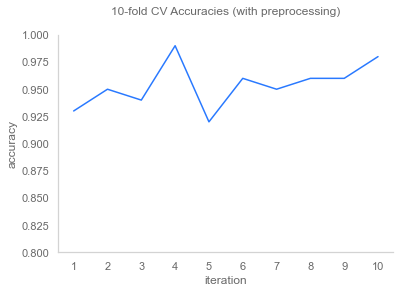

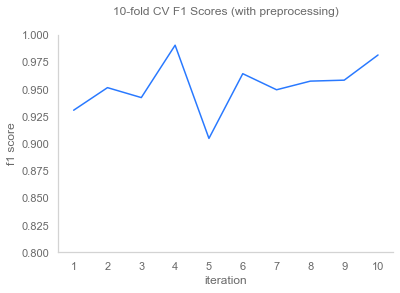

In [150]:
print("* WITHOUT PREPROCESSING *\n")
sP_accs, sP_precs, sP_recs, sP_f1s = display_cv_metrics(resnet_sP_cv10_metrics)

plot_line(range(1, len(sP_accs) + 1), sP_accs,
          "iteration", "accuracy",
          ymin=0.8,
          title="10-fold CV Accuracies (without preprocessing)")
plot_line(range(1, len(sP_f1s) + 1), sP_f1s,
          "iteration",
          "f1 score",
          ymin=0.8,
          title="10-fold CV F1 Scores (without preprocessing)")

print("----------------------------------------\n")

print("* WITH PREPROCESSING *\n")
aP_accs, aP_precs, aP_recs, aP_f1s = display_cv_metrics(resnet_aP_cv10_metrics)

plot_line(range(1, len(aP_accs) + 1), aP_accs,
          "iteration", "accuracy",
          ymin=0.8,
          title="10-fold CV Accuracies (with preprocessing)")
plot_line(range(1, len(aP_f1s) + 1), aP_f1s,
          "iteration", "f1 score",
          ymin=0.8,
          title="10-fold CV F1 Scores (with preprocessing)")

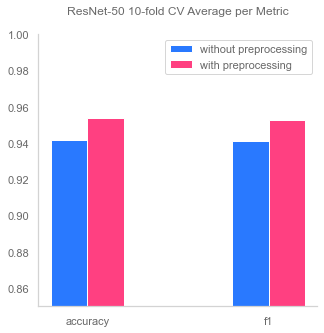

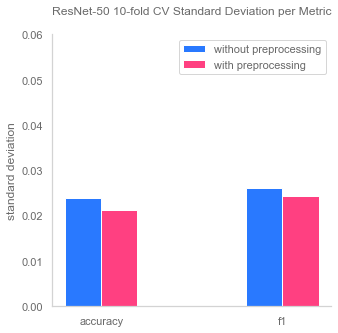

In [151]:
plot_sP_vs_aP([mean(sP_accs), mean(sP_f1s)],
              [mean(aP_accs), mean(aP_f1s)],
              ymin=0.85,
              title="ResNet-50 10-fold CV Average per Metric")

plot_sP_vs_aP([stdev(sP_accs), stdev(sP_f1s)],
              [stdev(aP_accs), stdev(aP_f1s)],
              ymin=0, ymax=0.06, ylabel="standard deviation",
              title="ResNet-50 10-fold CV Standard Deviation per Metric")

#### Location-based Cross Validation

* WITHOUT PREPROCESSING *

200 training locations
ACCURACY  |  mean: 0.686  stdev: 0.066
PRECISION |  mean: 0.83  stdev: 0.16
RECALL    |  mean: 0.558  stdev: 0.276
F1        |  mean: 0.609  stdev: 0.148

400 training locations
ACCURACY  |  mean: 0.746  stdev: 0.071
PRECISION |  mean: 0.803  stdev: 0.138
RECALL    |  mean: 0.723  stdev: 0.212
F1        |  mean: 0.733  stdev: 0.098

600 training locations
ACCURACY  |  mean: 0.773  stdev: 0.115
PRECISION |  mean: 0.819  stdev: 0.146
RECALL    |  mean: 0.77  stdev: 0.257
F1        |  mean: 0.755  stdev: 0.152

800 training locations
ACCURACY  |  mean: 0.727  stdev: 0.193
PRECISION |  mean: 0.89  stdev: 0.152
RECALL    |  mean: 0.598  stdev: 0.47
F1        |  mean: 0.584  stdev: 0.399

----------------------------------------

* WITH PREPROCESSING *

200 training locations
ACCURACY  |  mean: 0.744  stdev: 0.047
PRECISION |  mean: 0.785  stdev: 0.117
RECALL    |  mean: 0.707  stdev: 0.178
F1        |  mean: 0.723  stdev: 0.052

400 training

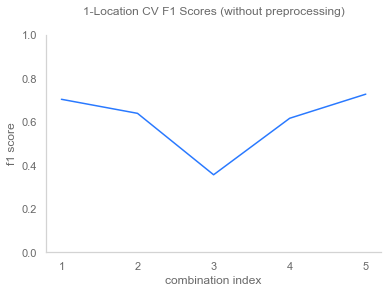

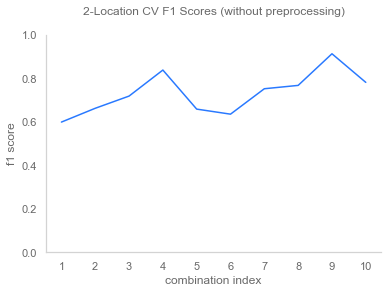

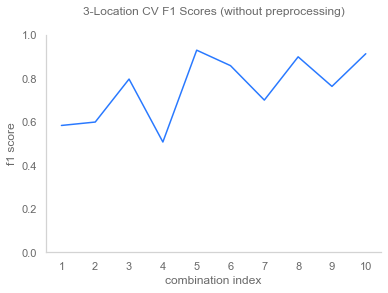

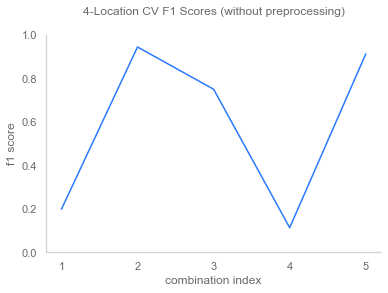

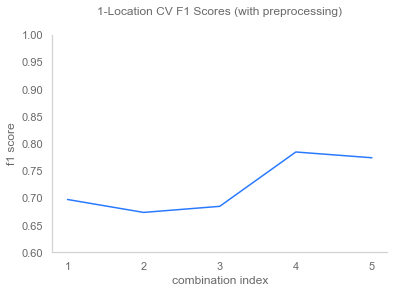

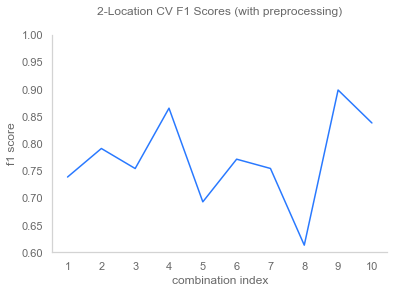

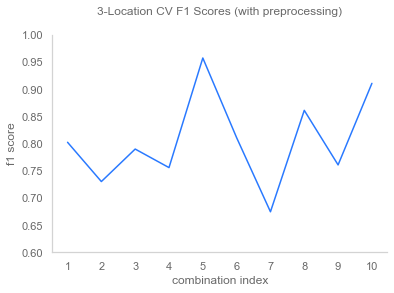

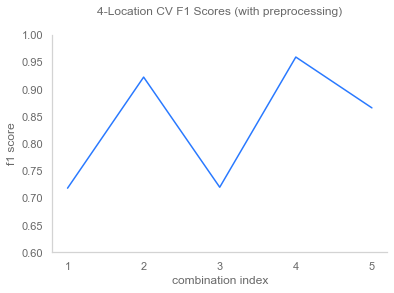

In [152]:
print("* WITHOUT PREPROCESSING *\n")
for cvloc_metrics in resnet_sP_cvlocs_metrics:
    print(f"{cvloc_metrics[0].train_size} training locations")
    sP_accs, sP_precs, sP_recs, sP_f1s = display_cv_metrics(cvloc_metrics)
    plot_line(range(1, len(sP_f1s) + 1), sP_f1s,
              "combination index", "f1 score",
              ymin=0,
              title=f"{len(cvloc_metrics[0].train_locs)}-Location CV F1 Scores (without preprocessing)")

print("----------------------------------------\n")

print("* WITH PREPROCESSING *\n")
for cvloc_metrics in resnet_aP_cvlocs_metrics:
    print(f"{cvloc_metrics[0].train_size} training locations")
    aP_accs, aP_precs, aP_recs, aP_f1s = display_cv_metrics(cvloc_metrics)
    plot_line(range(1, len(aP_f1s) + 1), aP_f1s,
              "combination index", "f1 score",
              ymin=0.6,
              title=f"{len(cvloc_metrics[0].train_locs)}-Location CV F1 Scores (with preprocessing)")

### SqueezeNet
#### 10-Fold Cross Validation

* WITHOUT PREPROCESSING *
ACCURACY  |  mean: 0.884  stdev: 0.042
PRECISION |  mean: 0.88  stdev: 0.036
RECALL    |  mean: 0.895  stdev: 0.055
F1        |  mean: 0.886  stdev: 0.034

----------------------------------------
* WITH PREPROCESSING *
ACCURACY  |  mean: 0.902  stdev: 0.029
PRECISION |  mean: 0.889  stdev: 0.057
RECALL    |  mean: 0.918  stdev: 0.03
F1        |  mean: 0.902  stdev: 0.032



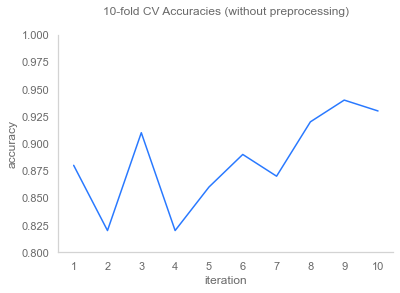

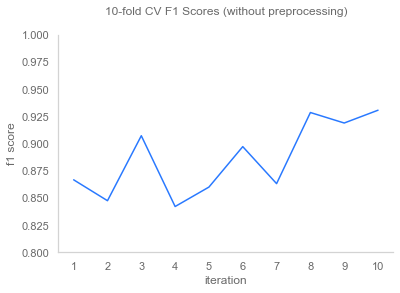

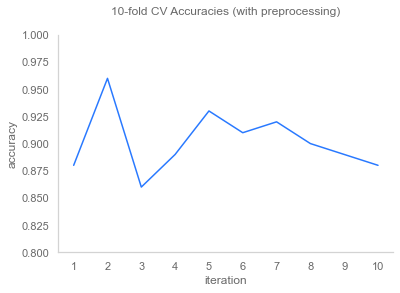

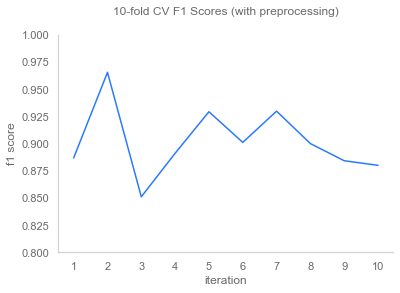

In [153]:
print("* WITHOUT PREPROCESSING *")
sP_accs, sP_precs, sP_recs, sP_f1s = display_cv_metrics(squeezenet_sP_cv10_metrics)

plot_line(range(1, len(sP_accs) + 1), sP_accs,
          "iteration", "accuracy",
          ymin=0.8,
          title="10-fold CV Accuracies (without preprocessing)")
plot_line(range(1, len(sP_f1s) + 1), sP_f1s,
          "iteration",
          "f1 score",
          ymin=0.8,
          title="10-fold CV F1 Scores (without preprocessing)")

print("----------------------------------------")

print("* WITH PREPROCESSING *")
aP_accs, aP_precs, aP_recs, aP_f1s = display_cv_metrics(squeezenet_aP_cv10_metrics)

plot_line(range(1, len(aP_accs) + 1), aP_accs,
          "iteration", "accuracy",
          ymin=0.8,
          title="10-fold CV Accuracies (with preprocessing)")
plot_line(range(1, len(aP_f1s) + 1), aP_f1s,
          "iteration", "f1 score",
          ymin=0.8,
          title="10-fold CV F1 Scores (with preprocessing)")

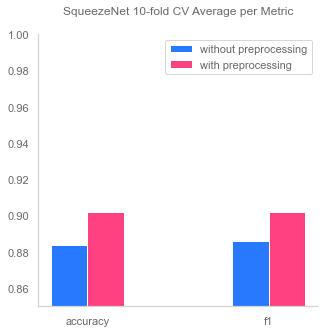

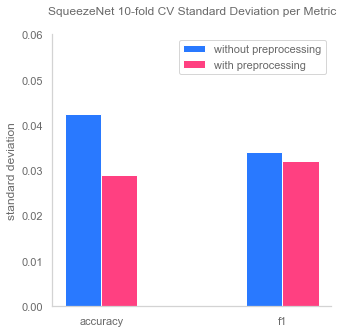

In [154]:
plot_sP_vs_aP([mean(sP_accs), mean(sP_f1s)],
              [mean(aP_accs), mean(aP_f1s)],
              ymin=0.85,
              title="SqueezeNet 10-fold CV Average per Metric")

plot_sP_vs_aP([stdev(sP_accs), stdev(sP_f1s)],
              [stdev(aP_accs), stdev(aP_f1s)],
              ymin=0, ymax=0.06, ylabel="standard deviation",
              title="SqueezeNet 10-fold CV Standard Deviation per Metric")

#### Location-based Cross Validation

* WITHOUT PREPROCESSING *

200 training locations
ACCURACY  |  mean: 0.702  stdev: 0.09
PRECISION |  mean: 0.751  stdev: 0.139
RECALL    |  mean: 0.7  stdev: 0.209
F1        |  mean: 0.693  stdev: 0.063

400 training locations
ACCURACY  |  mean: 0.738  stdev: 0.057
PRECISION |  mean: 0.767  stdev: 0.126
RECALL    |  mean: 0.765  stdev: 0.216
F1        |  mean: 0.735  stdev: 0.078

600 training locations
ACCURACY  |  mean: 0.731  stdev: 0.07
PRECISION |  mean: 0.756  stdev: 0.112
RECALL    |  mean: 0.781  stdev: 0.252
F1        |  mean: 0.73  stdev: 0.109

800 training locations
ACCURACY  |  mean: 0.747  stdev: 0.107
PRECISION |  mean: 0.791  stdev: 0.138
RECALL    |  mean: 0.77  stdev: 0.355
F1        |  mean: 0.707  stdev: 0.238

----------------------------------------

* WITH PREPROCESSING *

200 training locations
ACCURACY  |  mean: 0.678  stdev: 0.106
PRECISION |  mean: 0.674  stdev: 0.148
RECALL    |  mean: 0.853  stdev: 0.136
F1        |  mean: 0.732  stdev: 0.036

400 training 

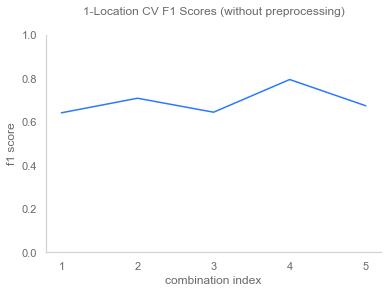

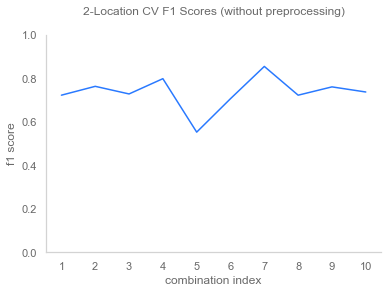

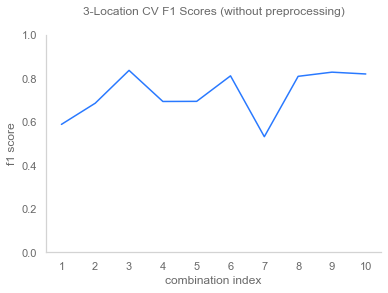

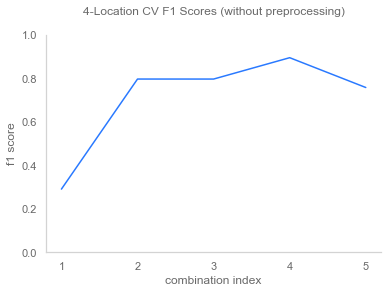

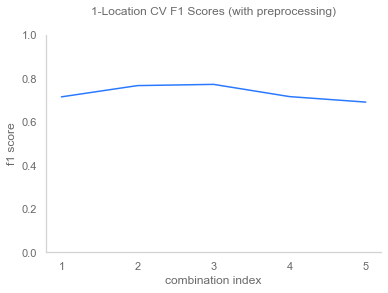

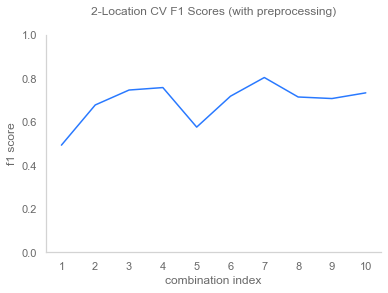

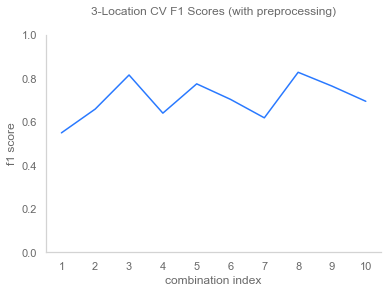

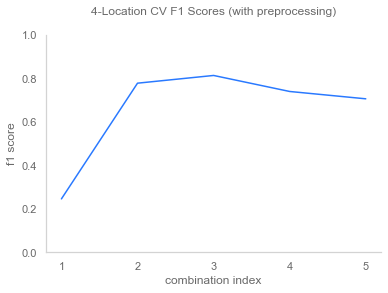

In [155]:
print("* WITHOUT PREPROCESSING *\n")
for cvloc_metrics in squeezenet_sP_cvlocs_metrics:
    print(f"{cvloc_metrics[0].train_size} training locations")
    sP_accs, sP_precs, sP_recs, sP_f1s = display_cv_metrics(cvloc_metrics)
    plot_line(range(1, len(sP_f1s) + 1), sP_f1s,
              "combination index", "f1 score",
              ymin=0,
              title=f"{len(cvloc_metrics[0].train_locs)}-Location CV F1 Scores (without preprocessing)")

print("----------------------------------------\n")

print("* WITH PREPROCESSING *\n")
for cvloc_metrics in squeezenet_aP_cvlocs_metrics:
    print(f"{cvloc_metrics[0].train_size} training locations")
    aP_accs, aP_precs, aP_recs, aP_f1s = display_cv_metrics(cvloc_metrics)
    plot_line(range(1, len(aP_f1s) + 1), aP_f1s,
              "combination index", "f1 score",
              ymin=0,
              title=f"{len(cvloc_metrics[0].train_locs)}-Location CV F1 Scores (with preprocessing)")

### VisionFeaturePrint_Scene
#### 10-Fold Cross Validation

* WITHOUT PREPROCESSING *
ACCURACY  |  mean: 0.942  stdev: 0.019
PRECISION |  mean: 0.94  stdev: 0.023
RECALL    |  mean: 0.944  stdev: 0.04
F1        |  mean: 0.941  stdev: 0.022

----------------------------------------
* WITH PREPROCESSING *
ACCURACY  |  mean: 0.952  stdev: 0.014
PRECISION |  mean: 0.958  stdev: 0.015
RECALL    |  mean: 0.946  stdev: 0.032
F1        |  mean: 0.951  stdev: 0.014



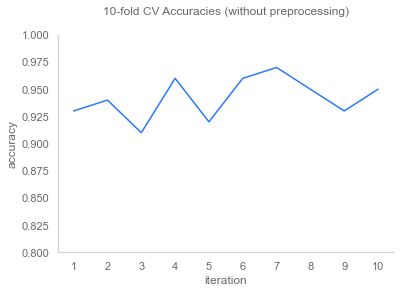

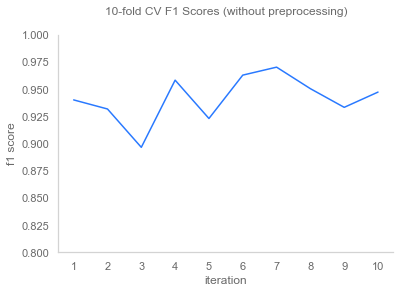

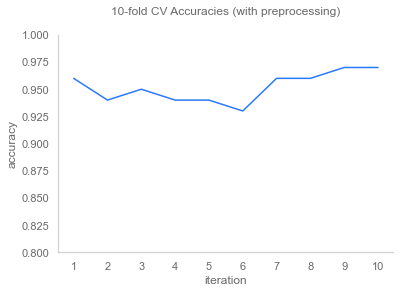

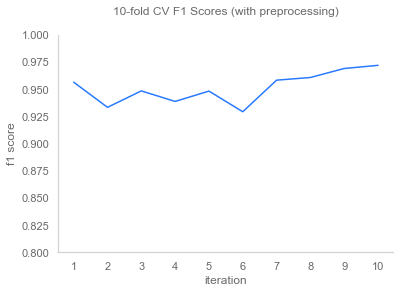

In [156]:
print("* WITHOUT PREPROCESSING *")
sP_accs, sP_precs, sP_recs, sP_f1s = display_cv_metrics(vfps_sP_cv10_metrics)

plot_line(range(1, len(sP_accs) + 1), sP_accs,
          "iteration", "accuracy",
          ymin=0.8,
          title="10-fold CV Accuracies (without preprocessing)")
plot_line(range(1, len(sP_f1s) + 1), sP_f1s,
          "iteration", "f1 score",
          ymin=0.8,
          title="10-fold CV F1 Scores (without preprocessing)")

print("----------------------------------------")

print("* WITH PREPROCESSING *")
aP_accs, aP_precs, aP_recs, aP_f1s = display_cv_metrics(vfps_aP_cv10_metrics)

plot_line(range(1, len(aP_accs) + 1), aP_accs,
          "iteration", "accuracy",
          ymin=0.8,
          title="10-fold CV Accuracies (with preprocessing)")
plot_line(range(1, len(aP_f1s) + 1), aP_f1s,
          "iteration", "f1 score",
          ymin=0.8,
          title="10-fold CV F1 Scores (with preprocessing)")

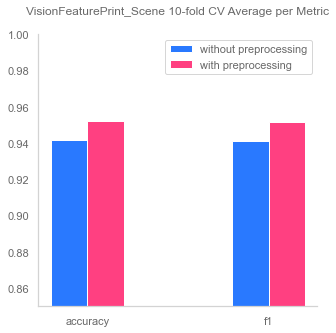

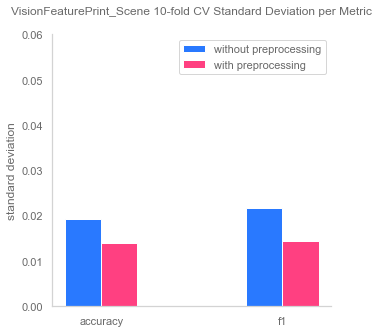

In [157]:
plot_sP_vs_aP([mean(sP_accs), mean(sP_f1s)],
              [mean(aP_accs), mean(aP_f1s)],
              ymin=0.85,
              title="VisionFeaturePrint_Scene 10-fold CV Average per Metric")

plot_sP_vs_aP([stdev(sP_accs), stdev(sP_f1s)],
              [stdev(aP_accs), stdev(aP_f1s)],
              ymin=0, ymax=0.06, ylabel="standard deviation",
              title="VisionFeaturePrint_Scene 10-fold CV Standard Deviation per Metric")

#### Location-based Cross Validation

* WITHOUT PREPROCESSING *

200 training locations
ACCURACY  |  mean: 0.78  stdev: 0.059
PRECISION |  mean: 0.753  stdev: 0.115
RECALL    |  mean: 0.878  stdev: 0.094
F1        |  mean: 0.8  stdev: 0.039

400 training locations
ACCURACY  |  mean: 0.836  stdev: 0.053
PRECISION |  mean: 0.852  stdev: 0.114
RECALL    |  mean: 0.847  stdev: 0.092
F1        |  mean: 0.839  stdev: 0.038

600 training locations
ACCURACY  |  mean: 0.85  stdev: 0.061
PRECISION |  mean: 0.857  stdev: 0.113
RECALL    |  mean: 0.864  stdev: 0.12
F1        |  mean: 0.849  stdev: 0.062

800 training locations
ACCURACY  |  mean: 0.845  stdev: 0.111
PRECISION |  mean: 0.881  stdev: 0.152
RECALL    |  mean: 0.856  stdev: 0.203
F1        |  mean: 0.843  stdev: 0.117

----------------------------------------

* WITH PREPROCESSING *

200 training locations
ACCURACY  |  mean: 0.698  stdev: 0.077
PRECISION |  mean: 0.735  stdev: 0.153
RECALL    |  mean: 0.759  stdev: 0.298
F1        |  mean: 0.686  stdev: 0.173

400 training

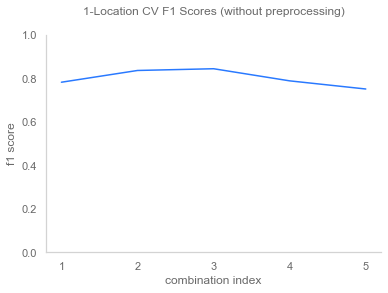

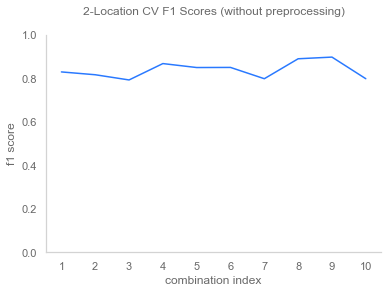

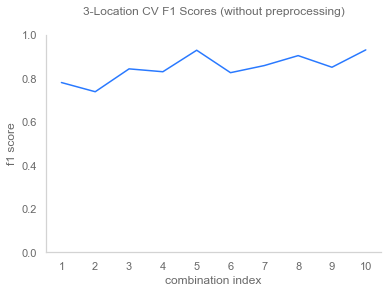

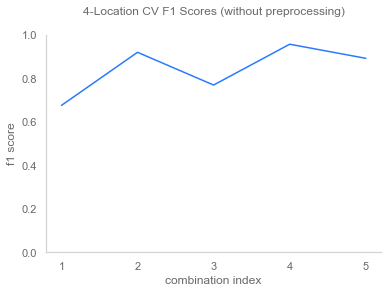

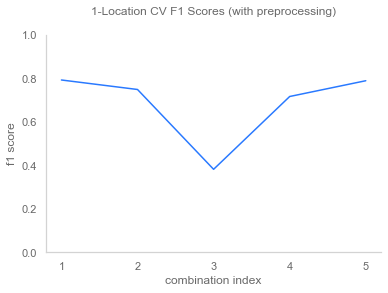

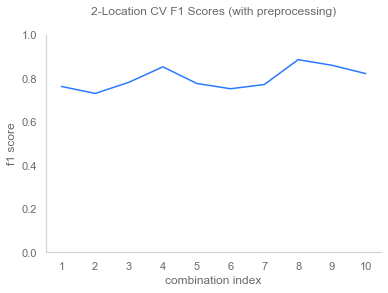

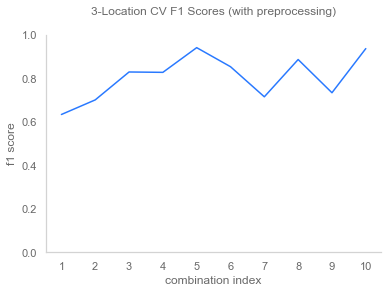

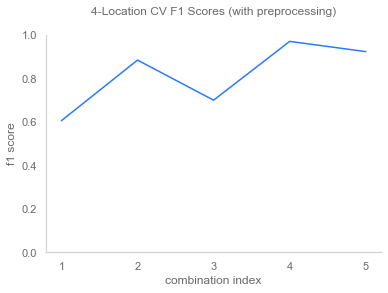

In [158]:
print("* WITHOUT PREPROCESSING *\n")
for cvloc_metrics in vfps_sP_cvlocs_metrics:
    print(f"{cvloc_metrics[0].train_size} training locations")
    sP_accs, sP_precs, sP_recs, sP_f1s = display_cv_metrics(cvloc_metrics)
    
    plot_line(range(1, len(sP_f1s) + 1), sP_f1s,
              "combination index", "f1 score",
              ymin=0,
              title=f"{len(cvloc_metrics[0].train_locs)}-Location CV F1 Scores (without preprocessing)")

print("----------------------------------------\n")

print("* WITH PREPROCESSING *\n")
for cvloc_metrics in vfps_aP_cvlocs_metrics:
    print(f"{cvloc_metrics[0].train_size} training locations")
    aP_accs, aP_precs, aP_recs, aP_f1s = display_cv_metrics(cvloc_metrics)
    
    plot_line(range(1, len(aP_f1s) + 1), aP_f1s,
              "combination index", "f1 score",
              ymin=0,
              title=f"{len(cvloc_metrics[0].train_locs)}-Location CV F1 Scores (with preprocessing)")

### Model Comparison

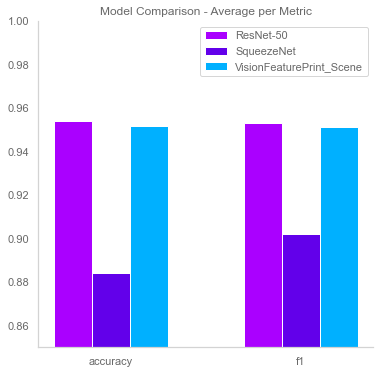

In [159]:
metrics = ["accuracy", "f1"]

resnet = [mean([metrics.accuracy for metrics in resnet_aP_cv10_metrics]),
          # mean([metrics.precision for metrics in resnet_aP_cv10_metrics]),
          # mean([metrics.recall for metrics in resnet_aP_cv10_metrics]),
          mean([metrics.f1 for metrics in resnet_aP_cv10_metrics])
          ]

squeezenet = [mean([metrics.accuracy for metrics in squeezenet_sP_cv10_metrics]),
          # mean([metrics.precision for metrics in squeezenet_sP_cv10_metrics]),
          # mean([metrics.recall for metrics in squeezenet_sP_cv10_metrics]),
          mean([metrics.f1 for metrics in squeezenet_aP_cv10_metrics])
          ]

vfps = [mean([metrics.accuracy for metrics in vfps_aP_cv10_metrics]),
          # mean([metrics.precision for metrics in vfps_aP_cv10_metrics]),
          # mean([metrics.recall for metrics in vfps_aP_cv10_metrics]),
          mean([metrics.f1 for metrics in vfps_aP_cv10_metrics])
          ]

x = np.arange(len(metrics))
bar_width = 0.2

plt.figure(figsize=(6, 6))
plt.bar(x - bar_width,
        resnet,
        bar_width,
        label="ResNet-50",
        color=[purple])
plt.bar(x,
        squeezenet,
        bar_width,
        label="SqueezeNet",
        color=[violet])
plt.bar(x + bar_width,
        vfps,
        bar_width,
        label="VisionFeaturePrint_Scene",
        color=[light_blue])

plt.xticks(x, metrics)
plt.ylim(0.85, 1.0)
plt.title("Model Comparison - Average per Metric")
plt.legend()
plt.show()

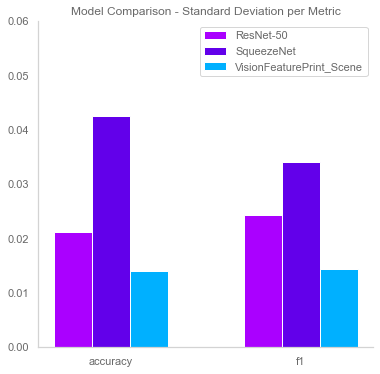

In [160]:
metrics = ["accuracy", "f1"]

resnet = [stdev([metrics.accuracy for metrics in resnet_aP_cv10_metrics]),
          # stdev([metrics.precision for metrics in resnet_aP_cv10_metrics]),
          # stdev([metrics.recall for metrics in resnet_aP_cv10_metrics]),
          stdev([metrics.f1 for metrics in resnet_aP_cv10_metrics])
          ]

squeezenet = [stdev([metrics.accuracy for metrics in squeezenet_sP_cv10_metrics]),
          # stdev([metrics.precision for metrics in squeezenet_sP_cv10_metrics]),
          # stdev([metrics.recall for metrics in squeezenet_sP_cv10_metrics]),
          stdev([metrics.f1 for metrics in squeezenet_sP_cv10_metrics])
          ]

vfps = [stdev([metrics.accuracy for metrics in vfps_aP_cv10_metrics]),
          # stdev([metrics.precision for metrics in vfps_aP_cv10_metrics]),
          # stdev([metrics.recall for metrics in vfps_aP_cv10_metrics]),
          stdev([metrics.f1 for metrics in vfps_aP_cv10_metrics])
          ]

x = np.arange(len(metrics))
bar_width = 0.2

plt.figure(figsize=(6, 6))
plt.bar(x - bar_width,
        resnet,
        bar_width,
        label="ResNet-50",
        color=[purple])
plt.bar(x,
        squeezenet,
        bar_width,
        label="SqueezeNet",
        color=[violet])
plt.bar(x + bar_width,
        vfps,
        bar_width,
        label="VisionFeaturePrint_Scene",
        color=[light_blue])

plt.xticks(x, metrics)
plt.ylim(0, 0.06)
plt.title("Model Comparison - Standard Deviation per Metric")
plt.legend()
plt.show()

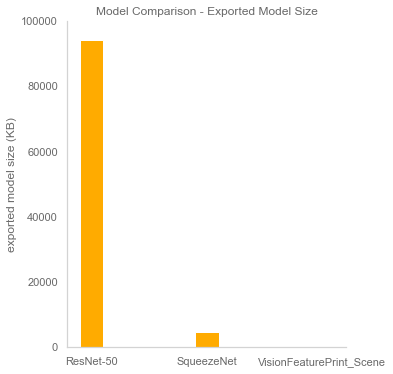

In [161]:
models = ["ResNet-50", "SqueezeNet", "VisionFeaturePrint_Scene"]

x = np.arange(len(models))
bar_width = 0.2
plt.figure(figsize=(5, 6))
plt.bar(x, [94216, 4596, 17], bar_width, color=[amber])
plt.xticks(x, models)
plt.ylim(0, 100000)
plt.ylabel("exported model size (KB)")
plt.title("Model Comparison - Exported Model Size")
plt.show()